In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import os
os.getcwd()
os.chdir("/home/jahn42/Desktop/workspace/Data")
os.getcwd()

'/home/jahn42/Desktop/workspace/Data'

In [18]:
# CSV File Containing All Scores - Not Ordered or Cleaned

scores = pd.read_csv("jahn_quiz_scores.csv")
scores

,Name,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 7,Quiz 8,Quiz 9,...,Quiz 3 Total,Quiz 4 Total,Quiz 5 Total,Quiz 6 Total,Quiz 7 Total,Quiz 8 Total,Quiz 9 Total,Total Points,Total Possible Points,In Berkeley
0,RM,2.0,2.0,4.0,6.0,6.0,3.0,3.0,6.0,5.0,...,5,6,8,6,6,6,6,37,50,1
1,AC,1.0,3.0,2.0,2.0,1.0,3.0,3.0,5.0,2.0,...,5,6,8,6,6,6,6,22,50,1
2,RR,0.0,3.0,5.0,6.0,7.0,4.0,3.0,6.0,5.0,...,5,6,8,6,6,6,6,39,50,1
3,DA,NaN,NaN,4.0,NaN,5.0,NaN,2.0,0.0,NaN,...,5,6,8,6,6,6,6,11,50,1
4,JG,2.0,NaN,5.0,4.0,3.0,2.0,3.0,6.0,4.0,...,5,6,8,6,6,6,6,29,50,1
5,ZS,NaN,2.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,...,5,6,8,6,6,6,6,27,50,1
6,WR,0.0,0.0,0.0,0.0,3.0,6.0,4.0,6.0,6.0,...,5,6,8,6,6,6,6,25,50,1
7,RJ,2.0,2.0,3.0,3.0,5.0,2.0,3.0,4.0,NaN,...,5,6,8,6,6,6,6,24,50,0
8,SG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,6,8,6,6,6,6,0,50,0
9,IV,1.0,NaN,NaN,3.0,2.0,NaN,2.0,3.0,2.0,...,5,6,8,6,6,6,6,13,50,0


In [22]:
def clean(data, quiz_number):
    
    "Removes Null Values and Creats A Total Percentage Column, which is (Total Points)/(Total Possible Points)"
    
    quiz_number = str(quiz_number)
    quiz = data[["Name", "Quiz "+ quiz_number, "Quiz "+ quiz_number + " Total", "In Berkeley"]]
    quiz = quiz.dropna(subset=["Quiz " + quiz_number])
    quiz["Total Percentage"] = quiz["Quiz " + quiz_number]/quiz["Quiz " + quiz_number+" Total"]*100
    quiz["Quiz " + quiz_number] = quiz["Quiz " + quiz_number].astype(int)


    return quiz

def describe_specific(data, quiz_number, berkeley):

    "FIlters The DataFrame by People who live in Berkeley or Do Not"
        
    quiz_number = str(quiz_number)

    results = data[data["In Berkeley"] == berkeley]
    results = results[["Quiz " + quiz_number]].describe()
    results.loc["median"] = np.median(data["Quiz " + quiz_number])
    results = results.transpose().drop(columns = ["count"])
    return results
    
def describe(data, quiz_number):

    "Computes and Shows Descriptive Statstics"
    
    quiz_number = str(quiz_number)
    results = data
    results = results[["Quiz " + quiz_number]].describe()
    results.loc["median"] = np.median(data["Quiz " + quiz_number])
    results = results.transpose().drop(columns = ["count"])
    return results


def plot_hist(data, quiz_number, type):

    """Plots a histogram with bins = 1, and a legend containining important statistics. 
    If type == True, only plots sats for people living in Berkeley
    Else, plots stats for both Berkeley and Not Berkeley."""
    
    quiz_number = str(quiz_number)

    if type == True:
            ax = sns.histplot(data = data, x="Quiz " + quiz_number, binrange=[0,data["Quiz " + quiz_number +" Total"][0]+1], binwidth=1, kde=True, hue = "In Berkeley", element = "step" )
    else:
            ax = sns.histplot(data = data, x="Quiz " + quiz_number, binrange=[0,data["Quiz " + quiz_number +" Total"][0]+1], binwidth=1, kde=True)

        

    ax.set_xticks(range(data["Quiz " + quiz_number +" Total"][0]+1))  # Set the positions of the ticks
    ax.set_xticklabels(range(data["Quiz " + quiz_number +" Total"][0]+1))
    ax.set_yticks(range(0, int(ax.get_ylim()[1])+1, 1))  # Set the positions of the y-axis ticks with step 1
    plt.xlabel("Quiz " + quiz_number + " Scores")
    plt.title("Quiz " + quiz_number + " - Out of "+str(data["Quiz " + quiz_number +" Total"][0]));
    mean_value = scores["Quiz " + quiz_number].mean()
    std_value = scores["Quiz " + quiz_number].std()
    min_value = scores["Quiz " + quiz_number].min()
    max_value = scores["Quiz " + quiz_number].max()
    median_value = scores["Quiz " + quiz_number].median()
    ax.scatter(mean_value, 2, color='blue', label='Mean', zorder=5)

    plt.legend([f'σ: {std_value:.2f}', f'x̄: {mean_value:.2f}', f"Median: {median_value}", f'Max: {max_value}'], loc='best')

    plt.savefig("quiz_" + quiz_number + ".pdf")





/home/jahn42/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


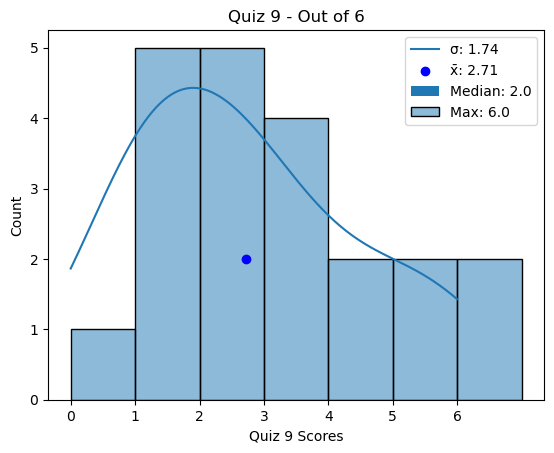

In [23]:
a = clean(scores,9) 
plot_hist(a, 9, False)

In [21]:
describe(a, 9)

,mean,std,min,25%,50%,75%,max,median
Quiz 9,2.714286,1.73617,0.0,1.0,2.0,4.0,6.0,2.0


In [10]:
# Quiz 9 Scores Ordered
a = a.sort_values(ascending = False, by = "Quiz 9").reset_index(drop=True)
a.index = a.index + 1
a


,Name,Quiz 9,Quiz 9 Total,In Berkeley,Total Percentage
1,WR,6,6,1,100.000000
2,MM,6,6,0,100.000000
3,RM,5,6,1,83.333333
4,RR,5,6,1,83.333333
5,JG,4,6,1,66.666667
6,ZS,4,6,1,66.666667
7,CF,3,6,0,50.000000
8,AP,3,6,0,50.000000
9,WK,3,6,0,50.000000
10,JC,3,6,1,50.000000


In [11]:
# TOP 5 HIGHEST SCORES - ALL QUIZES

scores = scores[["Name","Total Points", "Total Possible Points", "In Berkeley"]].sort_values(ascending = False, by = "Total Points").reset_index(drop=True)
scores.index = scores.index + 1
scores.head()

,Name,Total Points,Total Possible Points,In Berkeley
1,MM,44,50,0
2,RR,39,50,1
3,RM,37,50,1
4,AP,33,50,0
5,JG,29,50,1


In [13]:
# All Scores - ALL QUIZES

scores = scores[["Name","Total Points", "Total Possible Points", "In Berkeley"]].sort_values(ascending = False, by = "Total Points").reset_index(drop=True)
scores.index = scores.index + 1
scores

,Name,Total Points,Total Possible Points,In Berkeley
1,MM,44,50,0
2,RR,39,50,1
3,RM,37,50,1
4,AP,33,50,0
5,JG,29,50,1
6,ZS,27,50,1
7,WR,25,50,1
8,JC,25,50,1
9,WK,24,50,0
10,RJ,24,50,0


In [80]:

"""
#Plots a histogram with total points for all quizes. Will Uncomment At The End of the Semester...

ax = sns.histplot(data = scores, x=scores["Total Points"], kde = True)
ax.set_yticks(range(0, int(ax.get_ylim()[1])+1, 1))  
plt.xlabel("Points Accumulated")


mean_value = scores["Total Points"].mean()
std_value = scores["Total Points"].std()
min_value = scores["Total Points"].min()
max_value = scores["Total Points"].max()
median_value = scores["Total Points"].median()

ax.scatter(mean_value, 2, color='blue', label='Mean', zorder=5)
plt.legend([f'σ: {std_value:.2f}', f'x̄: {mean_value:.2f}', f"Median: {5}", f'Max: {max_value}'], loc='upper right')

#plt.savefig("scores.pdf")

"""

'\n#Plots a histogram with total points for all quizes. Will Uncomment At The End of the Semester...\n\nax = sns.histplot(data = scores, x=scores["Total Points"], kde = True)\nax.set_yticks(range(0, int(ax.get_ylim()[1])+1, 1))  \nplt.xlabel("Points Accumulated")\n\n\nmean_value = scores["Total Points"].mean()\nstd_value = scores["Total Points"].std()\nmin_value = scores["Total Points"].min()\nmax_value = scores["Total Points"].max()\nmedian_value = scores["Total Points"].median()\n\nax.scatter(mean_value, 2, color=\'blue\', label=\'Mean\', zorder=5)\nplt.legend([f\'σ: {std_value:.2f}\', f\'x̄: {mean_value:.2f}\', f"Median: {5}", f\'Max: {max_value}\'], loc=\'upper right\')\n\n#plt.savefig("scores.pdf")\n\n'